# F82 Coincidence Spectrometry

Experiment carried out by Mathieu Kaltschmidt and Quirinus Schwarzenböck at INF 501 in Heidelberg during the week of the  05th of november of 2018. <br>
<br>
__Supervisor:__ Philipp Weidenkaff

In [92]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy.special import gamma

#Plot settings
plt.rcParams["font.family"]='serif'
plt.rcParams["figure.figsize"][0] = 16
plt.rcParams["figure.figsize"][1] = 10
plt.rcParams['errorbar.capsize']=4

## Second part: $\gamma$-spectrum for different elements

In [138]:
#We measure in 2048 channels
channels = np.arange(0,2048)

#Conversion from channels to energies using a result from a fit we perform later
conv = 0.0012031681791 #MeV/channel ( = popt[0], see below)

energies = conv * channels #MeV

### $^{60}$ Co spectrum

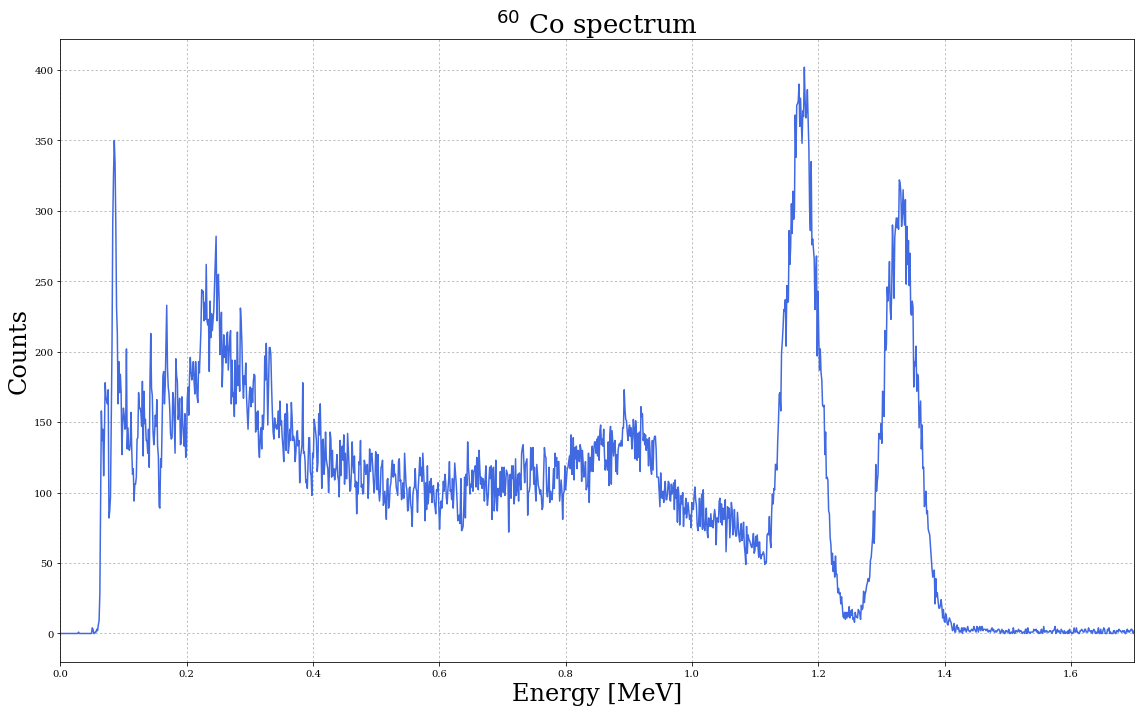

In [140]:
co_counts  = np.loadtxt(r'DATA/Gamma-spectra/Co60.txt', unpack=True)

#Plotting the result
plt.plot(energies, co_counts, color = 'royalblue')
plt.title('$^{60}$ Co spectrum', size = 26)
plt.xlabel('Energy [MeV]', size = 24)
plt.ylabel('Counts', size = 24)
plt.xlim(0,1.7)
plt.grid(ls='dotted')

#Saving the result
plt.tight_layout()
plt.savefig('Plots/Co60.pdf')

In [234]:
#relevant DATA from plot
peaks_Co = [976, 1107]
fwhm_Co = [40,55]

### $^{137}$Cs spectrum

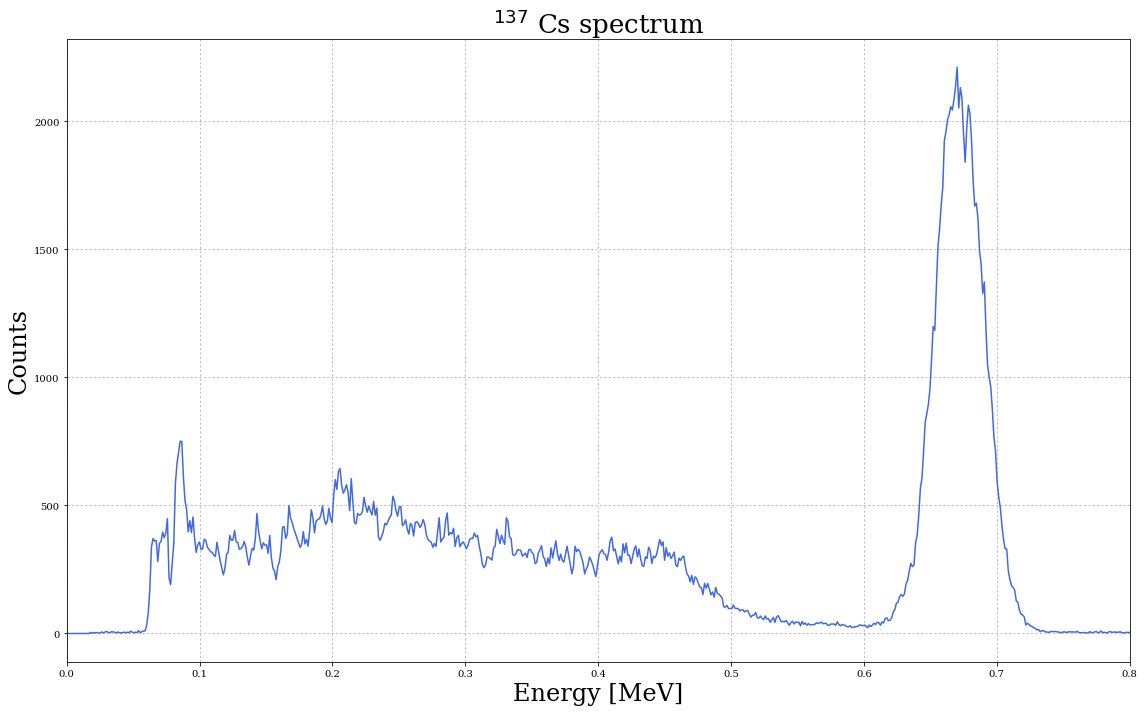

In [146]:
cs_counts  = np.loadtxt(r'DATA/Gamma-spectra/Cs137.txt', unpack=True)

#Plotting the result
plt.plot(energies, cs_counts, color = 'royalblue')
plt.title('$^{137}$ Cs spectrum', size = 26)
plt.xlabel('Energy [MeV]', size = 24)
plt.ylabel('Counts', size = 24)
plt.xlim(0,0.8)
plt.grid(ls='dotted')

#Saving the result
plt.tight_layout()
plt.savefig('Plots/Cs137.pdf')

In [6]:
#relevant DATA from plot
peak_Cs = 557
fwhm_Cs = 38

### $^{133}$Ba spectrum

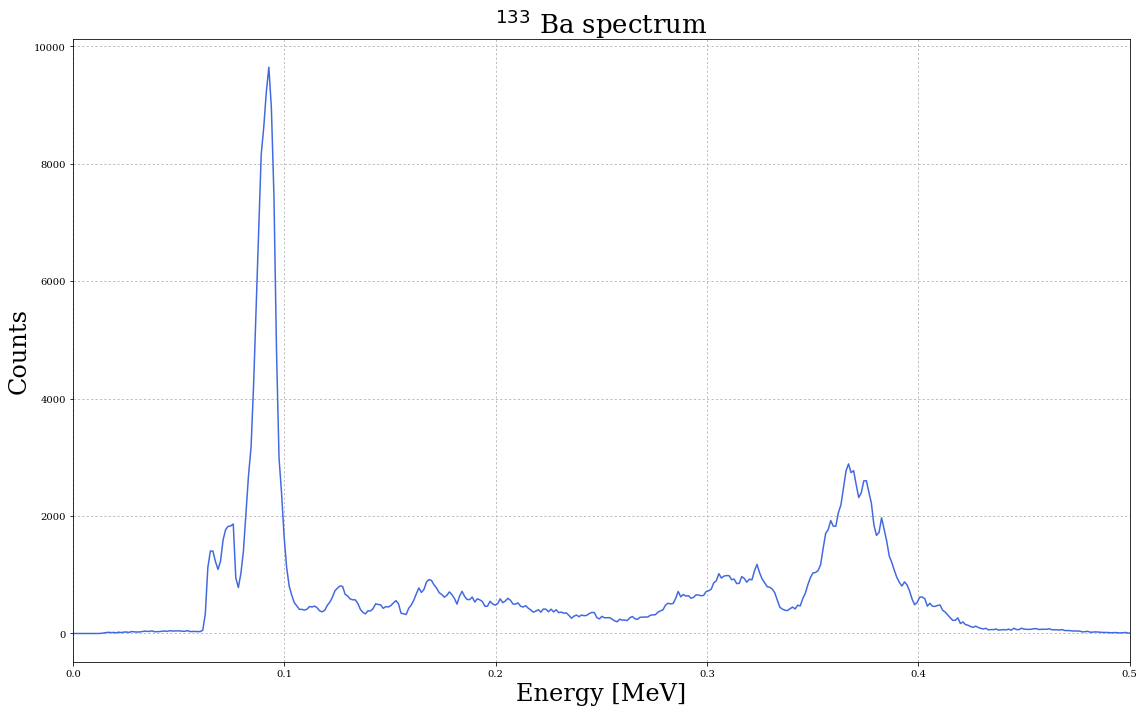

In [145]:
ba_counts  = np.loadtxt(r'DATA/Gamma-spectra/Ba133.txt', unpack=True)

#Plotting the result
plt.plot(energies, ba_counts, color = 'royalblue')
plt.title('$^{133}$ Ba spectrum', size = 26)
plt.xlabel('Energy [MeV]', size = 24)
plt.ylabel('Counts', size = 24)
plt.xlim(0,0.5)
plt.grid(ls='dotted')

#Saving the result
plt.tight_layout()
plt.savefig('Plots/Ba133.pdf')

In [8]:
#relevant DATA from plot
peak_Ba = 306
fwhm_Ba = 27

### $^{54}$Mn spectrum

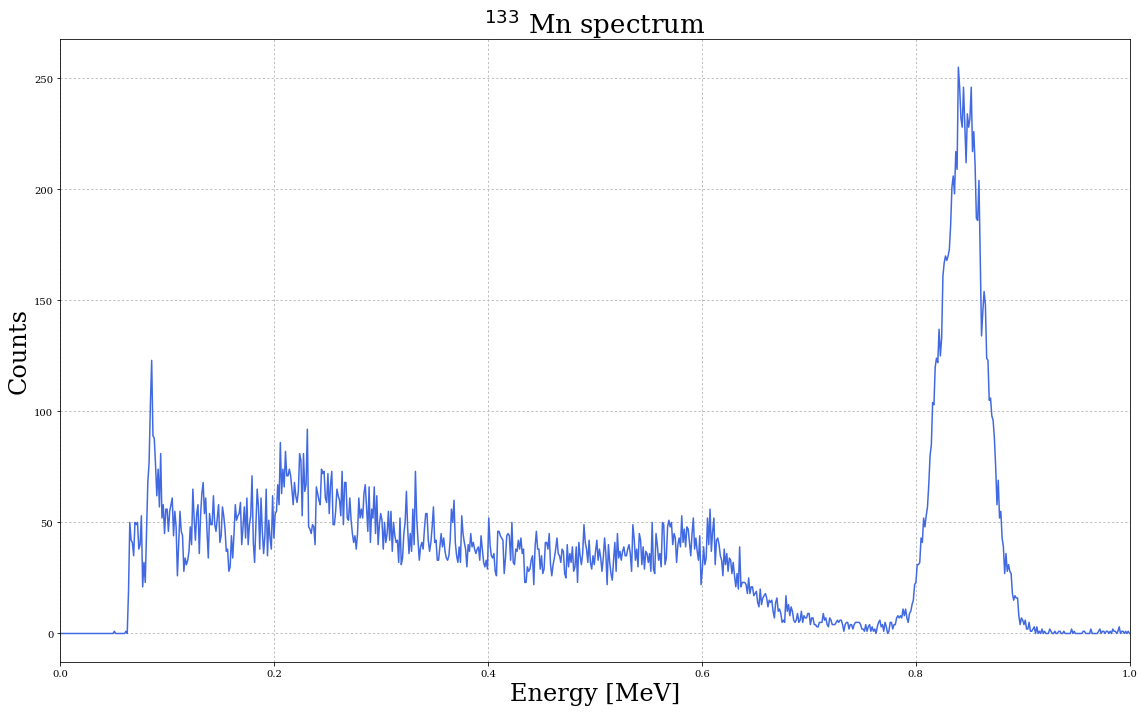

In [149]:
mn_counts  = np.loadtxt(r'DATA/Gamma-spectra/Mn54.txt', unpack=True)

#Plotting the result
plt.plot(energies, mn_counts, color = 'royalblue')
plt.title('$^{133}$ Mn spectrum', size = 26)
plt.xlabel('Energy [MeV]', size = 24)
plt.ylabel('Counts', size = 24)
plt.xlim(0,1)
plt.grid(ls='dotted')

#Saving the result
plt.tight_layout()
plt.savefig('Plots/Mn54.pdf')

In [10]:
#relevant DATA from plot
peak_Mn = 704
fwhm_Mn = 42

### $^{22}$Na spectrum

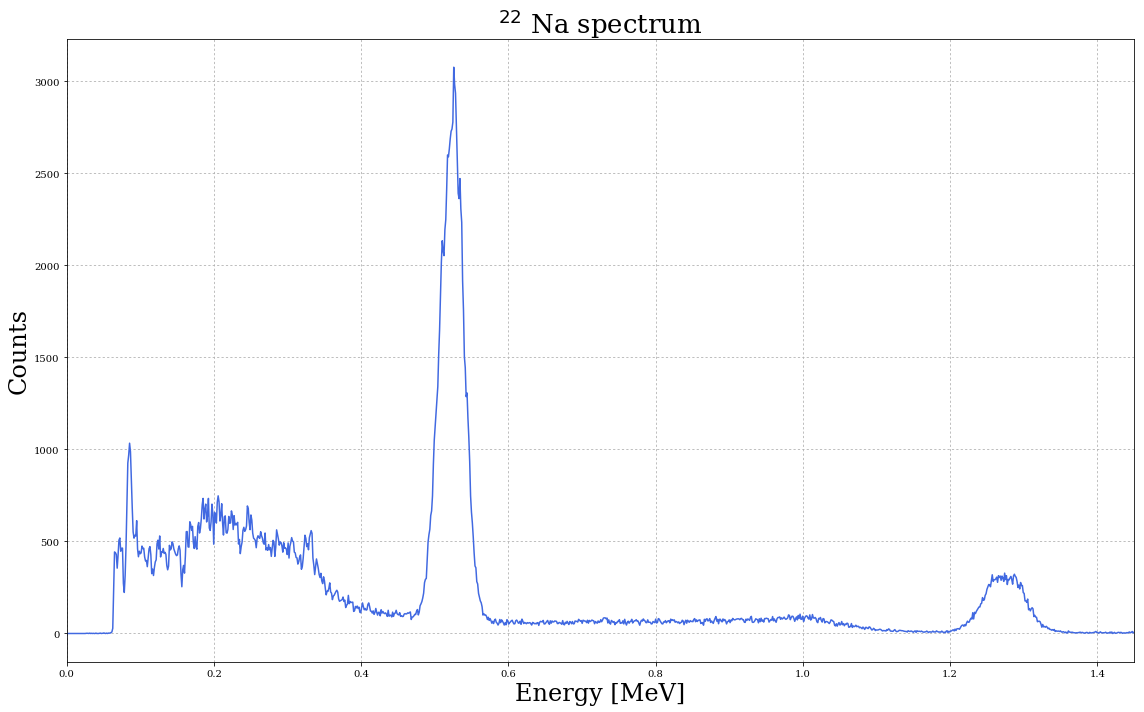

In [152]:
na_counts  = np.loadtxt(r'DATA/Gamma-spectra/Na22.txt', unpack=True)

#Plotting the result
plt.plot(energies, na_counts, color = 'royalblue')
plt.title('$^{22}$ Na spectrum', size = 26)
plt.xlabel('Energy [MeV]', size = 24)
plt.ylabel('Counts', size = 24)
plt.xlim(0,1.45)
plt.grid(ls='dotted')

#Saving the result
plt.tight_layout()
plt.savefig('Plots/Na22.pdf')

In [12]:
#relevant DATA from plot
peak_Na = 1054
fwhm_Na = 51

### Calibration of the channels
We need to determine a calibration line for with our results of the measurement for  $^{60}$CO, $^{137}$Cs, $^{133}$Ba, $^{54}$Mn and $^{22}$Na, by measuring the position of the total absorption lines in the spectra.

In [119]:
#Looking for the peaks in our measured spectra. Order: Co, Co, Cs, Mn, Na
channels2 = np.array([peaks_Co[0], peaks_Co[1], peak_Cs, peak_Ba, peak_Mn, peak_Na])

#Standard deviation from FWHM
channels2_err = np.array([fwhm_Co[0], fwhm_Co[1], fwhm_Cs, fwhm_Ba, fwhm_Mn, fwhm_Na]/(2*np.sqrt(2*np.log(2))))

#Theoretical values from script
energies_theo = np.array([1.17323, 1.33248, 0.6616, 0.382 , 0.8353, 1.2746]) #MeV

In [120]:
#Linear Fit
def linear(x,a):
    return a*x

popt, pcov = curve_fit(linear, channels2, energies_theo, sigma = channels2_err)
fitrange = np.linspace(0,1300,2)

print('The energy gain per channel has been determined to:')
print('G = (' + str(popt[0]*1e3) + ' +/- ' + str(np.sqrt(pcov[0,0])*1e3) + ') keV/channel.')

The energy gain per channel has been determined to:
G = (1.2031681791 +/- 0.00630673576914) keV/channel.


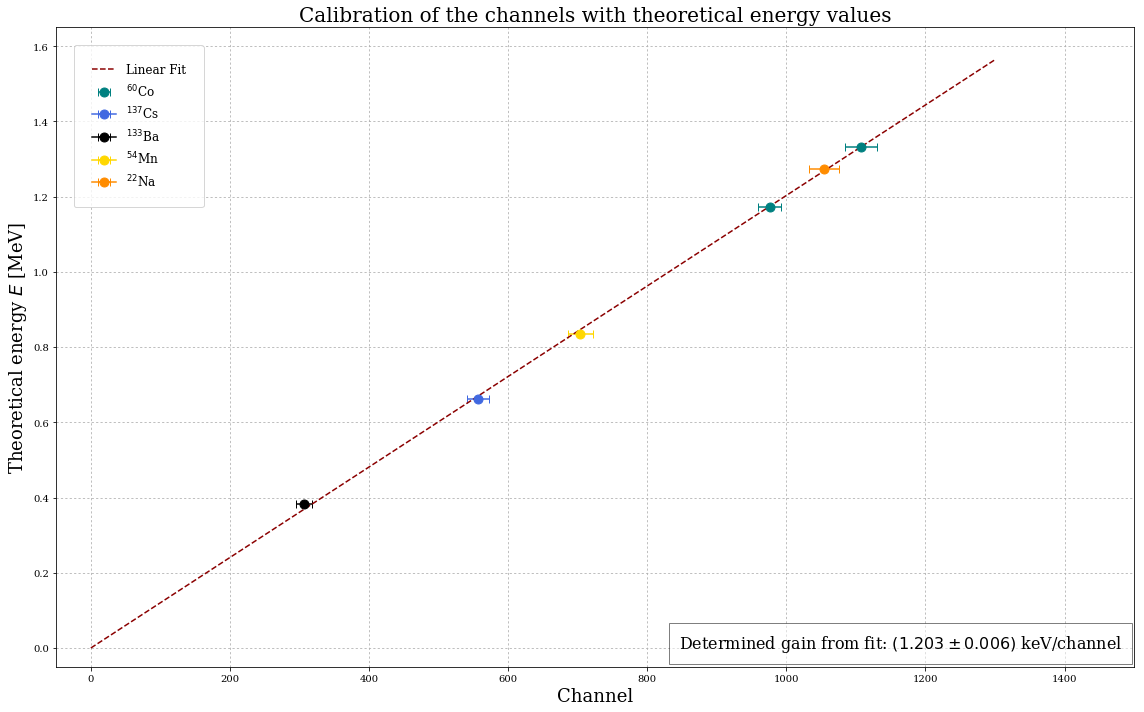

In [93]:
#Plotting the result
plt.errorbar(channels2[:2],energies_theo[:2], xerr = channels2_err[:2], color = 'teal',label = r'$^{60}$Co', marker = 'o', ls = ' ', ms = 9)
plt.errorbar(channels2[2],energies_theo[2], xerr = channels2_err[2],color = 'royalblue',label = r'$^{137}$Cs', marker = 'o', ms = 9)
plt.errorbar(channels2[3],energies_theo[3], xerr = channels2_err[3],color = 'black',label = r'$^{133}$Ba', marker = 'o', ms = 9)
plt.errorbar(channels2[4],energies_theo[4], xerr = channels2_err[4],color = 'gold',label = r'$^{54}$Mn', marker = 'o', ms = 9)
plt.errorbar(channels2[5],energies_theo[5], xerr = channels2_err[5],color = 'darkorange',label = r'$^{22}$Na', marker = 'o', ms = 9)
plt.plot(fitrange, linear(fitrange, *popt), color = 'darkred', ls = '--', label = 'Linear Fit')

plt.title('Calibration of the channels with theoretical energy values', size = 20)
plt.xlabel('Channel', size = 18)
plt.ylabel('Theoretical energy $E $ [MeV]', size = 18)
plt.xlim(-50,1500)
plt.ylim(-0.05,1.65)

plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')
plt.text(845,2e-5, "Determined gain from fit: $ (1.203 \pm 0.006)$ keV/channel",bbox={'facecolor':'white', 'alpha':0.5, 'pad':10},size=16)

plt.grid(ls='dotted')

#Saving the result
plt.tight_layout()
plt.savefig('Plots/calibration.pdf', format='PDF')

### Energy resolution

In [232]:
#Conversion from channels to energy and error from fit results
E = conv * channels2
dE = conv * channels2_err

#Sorting the arrays
args = np.argsort(E)
E = E[args]
dE = dE[args]

#estimated error for  determining the fwhm (approx. 10 percent)
ddE = 0.1*dE


E_res = dE / E
E_res_err = E_res * np.sqrt((dE/E)**2+(ddE/E)**2)

#Fitting function to determine the power of the decrease the resolution error (expected = 1/sqrt(x)) 
def powerlaw(x,a,b):
    return a*x**b 
popt2,pcov2 = curve_fit(powerlaw, E, E_res, sigma=E_res_err)

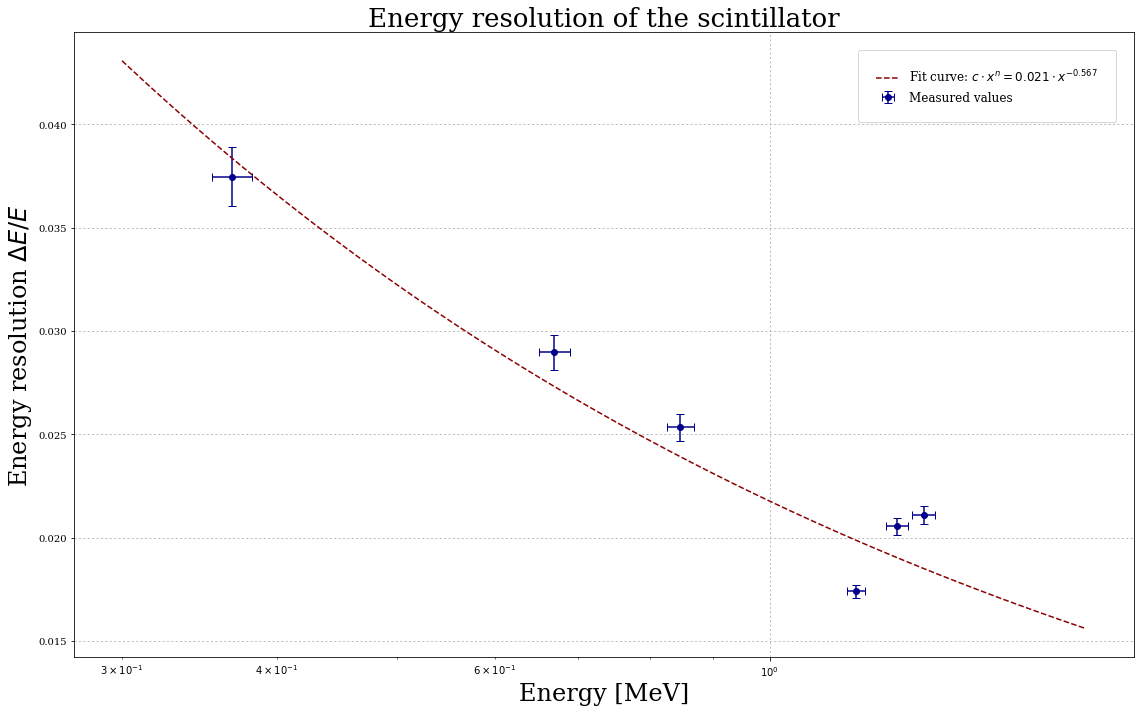

In [231]:
newrange = np.linspace(0.3,1.8,100)

#Plotting the result
plt.plot(testrange,powerlaw(testrange,*popt2), color = 'darkred', ls = '--', label = 'Fit curve: $c\cdot x^n = 0.021 \cdot x^{-0.567}$')
plt.errorbar(E, E_res, xerr = dE, yerr = E_res_err, color = 'darkblue', marker = 'o', ls = ' ', label = 'Measured values')
plt.title('Energy resolution of the scintillator', size = 26)
plt.xlabel('Energy [MeV]', size = 24)
plt.xticks([0.3, 0.4, 0.6, 1.0],['0.3', '0.4', '0.6', '1.0'])
plt.ylabel(r'Energy resolution $\Delta E/E$', size = 24)
plt.xscale('log')
plt.grid(ls='dotted')

plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')
#plt.text(845,2e-5, "Determined gain from fit: $ (1.203 \pm 0.006)$ keV/channel",bbox={'facecolor':'white', 'alpha':0.5, 'pad':10},size=16)



#Saving the result
plt.tight_layout()
plt.savefig('Plots/energy_resolution.pdf', format='PDF')

## Third part: Coincidence measurements

### Time resolution

In this part we want to calibrate the time resolution, again with the help of a calibration line.

In [16]:
#Importing the different measurements
t1 = np.loadtxt(r'DATA/time_resolution/time3.txt', unpack=True)
t2 = np.loadtxt(r'DATA/time_resolution/time4.txt', unpack=True)
t3 = np.loadtxt(r'DATA/time_resolution/time5.txt', unpack=True)
t4 = np.loadtxt(r'DATA/time_resolution/time6.txt', unpack=True)
t5 = np.loadtxt(r'DATA/time_resolution/time7.txt', unpack=True)

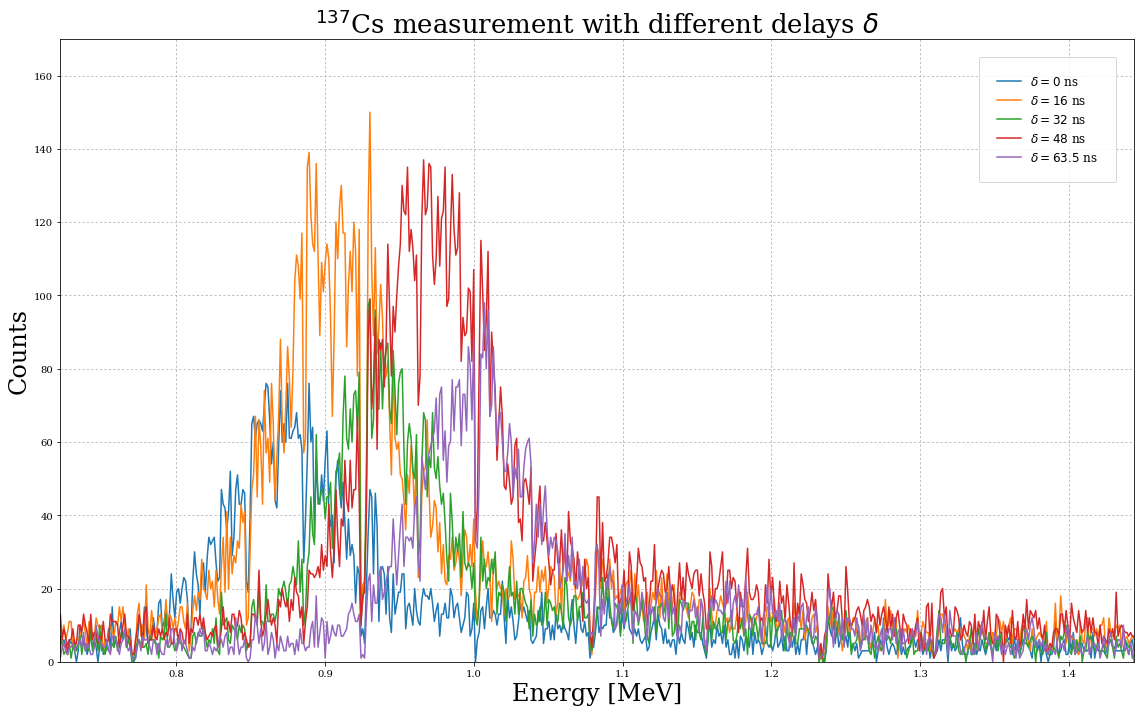

In [67]:
#Plotting all steps
plt.plot(energies, t1, label = r'$\delta = 0$ ns')
plt.plot(energies, t2, label = r'$\delta = 16$ ns')
plt.plot(energies, t3, label = r'$\delta = 32$ ns')
plt.plot(energies, t4, label = r'$\delta = 48$ ns')
plt.plot(energies, t5, label = r'$\delta = 63.5$ ns')

plt.title('$^{137}$Cs measurement with different delays $\delta$', size = 26)
plt.xlabel('Energy [MeV]', size = 24)
plt.ylabel('Counts', size = 24)
plt.ylim(0,170)
plt.xlim(600*popt[0],1200*popt[0])

plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')
plt.grid(ls='dotted')

#Saving the result
plt.tight_layout()
plt.savefig('Plots/delays.pdf', format='PDF')

Now we determine the position of the peak for all of the five measurements and use the result to calibrate the time resolution.

In [86]:
#peak position and fwhm for increasing delays
peaks= popt[0]*np.array([725,760,780,805,835])
fwhm = popt[0]*np.array([85,75,75,100,60]/(2*np.sqrt(2*np.log(2))))

delays=[0,16,32,48,63.5] #ns

In [157]:
def linear2(x,a,b):
    return a*x+b

popt3, pcov3 = curve_fit(linear2, peaks, delays , sigma = fwhm)
fitrange2 = np.linspace(0.85,1.05,2)

print('The time resolution has been determined to: ('+ str(np.round(popt3[0],1)) + ' +/- ' + str(np.round(np.sqrt(pcov3[0,0]),1)) + ') [ns/MeV]')

The time resolution has been determined to: (494.3 +/- 21.8) [ns/MeV]


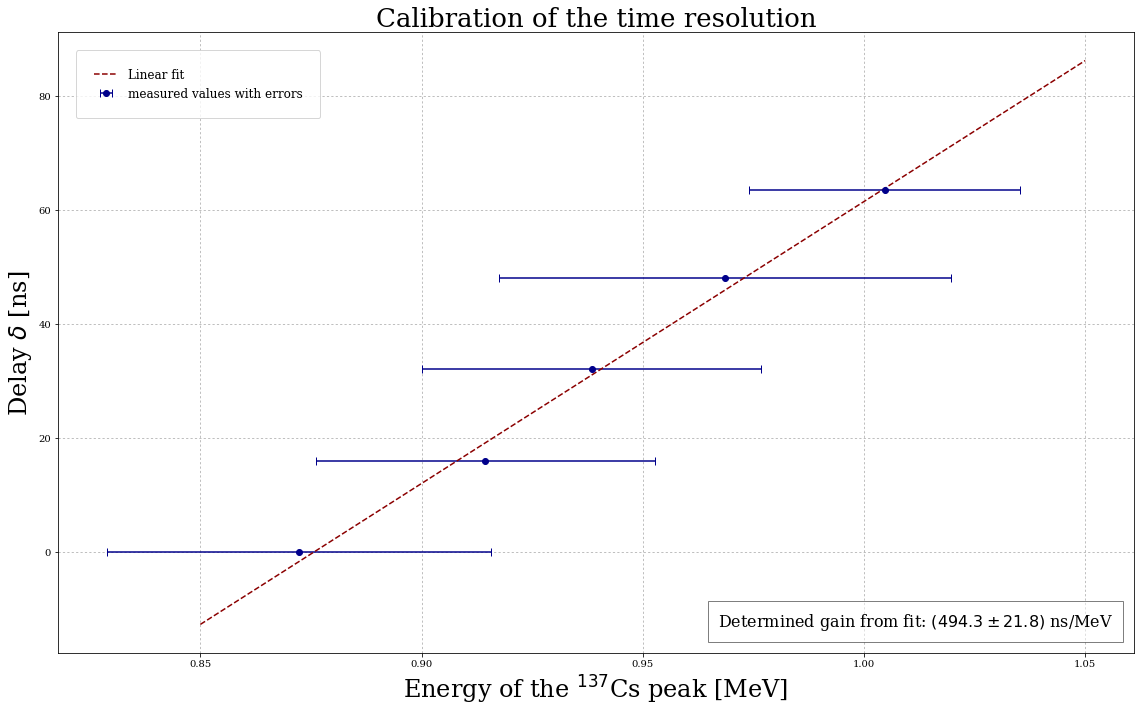

In [158]:
#Plotting all steps
plt.plot(fitrange2, linear2(fitrange2,*popt3), color = 'darkred', ls = '--', label = 'Linear fit')
plt.errorbar(peaks, delays, xerr = fwhm, label = r'measured values with errors', color = 'darkblue', ls = ' ', marker = 'o')
plt.title('Calibration of the time resolution', size = 26)
plt.xlabel(r'Energy of the $^{137}$Cs peak [MeV]', size = 24)
plt.ylabel('Delay $\delta$ [ns]', size = 24)
plt.text(0.967,-13, "Determined gain from fit: $ (494.3 \pm 21.8)$ ns/MeV",bbox={'facecolor':'white', 'alpha':0.5, 'pad':10},size=16)

plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')
plt.grid(ls='dotted')

#Saving the result
plt.tight_layout()
plt.savefig('Plots/time_resolution.pdf', format='PDF')